# **Data Analysis Workflow and Model Understanding**

Focuses on defining the data analysis workflow and understanding the model and data. This involves planning the analysis steps needed to achieve the project’s objective and ensuring a clear understanding of the key concepts related to the project.

### **Key Objectives**

1. Identify major events that have affected Brent oil prices.
2. Quantify the impact of these events on price changes.
3. Deliver insights to guide investment, policy development, and operational planning.

### **Data**

The dataset includes historical Brent oil prices from May 20, 1987, to September 30, 2022, with daily records of price per barrel in USD.

**Data Fields**

- `Date`: The date of the recorded price.
- `Price`: The daily price of Brent oil in USD.

#### **Define the Data Analysis Workflow**

- **Data Collection**: Start by importing the historical Brent oil price data. This may include additional economic, political, and technological data for further analysis.

- **Data Preprocessing**: Clean and preprocess the data to ensure consistency, handle missing values, and prepare it for time series modeling.

- **Exploratory Data Analysis (EDA)**: Conduct EDA to understand patterns, trends, and correlations. Use visualizations to inspect seasonal effects, trends, and volatility in oil prices.

- **Change Point Analysis**: Apply change point detection to identify significant shifts in oil prices, possibly due to external events.

- **Time Series Modeling**: Implement basic models like ARIMA and GARCH to capture the price trends, seasonality, and volatility.

- **Advanced Modeling**: Later, consider more complex models (e.g., VAR, LSTM) to capture intricate patterns and multiple influencing factors.

- **Model Evaluation**: Assess model performance using metrics such as RMSE, MAE, and R-squared.

- **Insight Generation**: Translate findings into actionable insights, focusing on event impacts on price trends.

Since We define our workflow let's start by importing some libraries, and defined functions

In [1]:
import sys
import os
from pathlib import Path

# Add the src directory to the Python path
sys.path.append(os.path.join(os.path.dirname('../'), 'src'))

In [2]:
from data_preprocessing import load_data
from eda import plot_time_series, seasonal_decomposition
from change_point_analysis import detect_change_points, plot_change_points,\
    bayesian_change_point_analysis, plot_bayesian_change_points
from time_series_models import fit_arima_model, plot_arima_forecast, fit_garch_model, plot_garch_volatility

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Data Collection and Preprocessing

In [3]:
# Load and preprocess data
df = load_data('../data/BrentOilPrices.csv')

/home/seyfe/Desktop/KAIM/Brent_Oil_Price_Analysis/notebooks/../src/data_preprocessing.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(filepath, parse_dates=['Date'], dayfirst=True)


In [4]:
df.head()

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


## Exploratory Data Analysis (EDA)

Conduct EDA to understand the time series properties. Check for trends, seasonality, and possible anomalies.

In [5]:
# Summary statistics
print(df['Price'].describe())

count    9011.000000
mean       48.420782
std        32.860110
min         9.100000
25%        19.050000
50%        38.570000
75%        70.090000
max       143.950000
Name: Price, dtype: float64


The **summary statistics** for the Price column provide insights into the distribution of Brent oil prices.

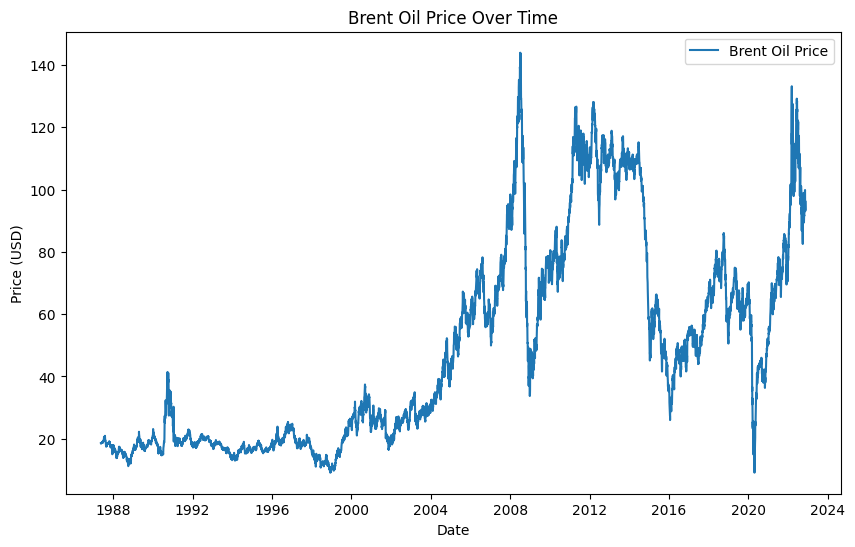

In [6]:
# EDA
plot_time_series(df)

**Key Observations:**

`Long-Term Trend:` Brent oil prices generally increase over time, but with significant fluctuations.

`Notable Peaks:`

- Around 2008, there is a major spike, reaching the highest price on the chart.
- Another peak occurs around 2012-2014.
- A recent peak appears around 2022.

`Periods of Decline`: Following each peak, there are sharp declines, notably after 2008, 2014, and 2022, indicating periods of price correction or market shifts.

Overall, the chart reflects the volatility of Brent oil prices, influenced by economic events, geopolitical factors, and supply-demand dynamics over the decades.

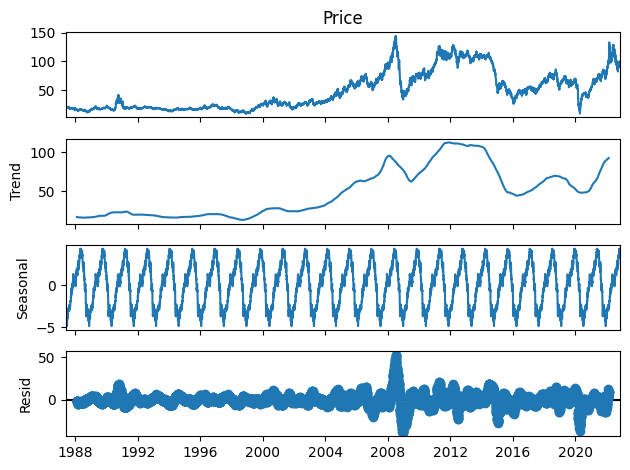

In [7]:
seasonal_decomposition(df)

## Change Point Detection
For detecting change points, we can use PyMC3 to set up a Bayesian model or a simpler approach like the ruptures library for initial insights.

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [change_point]
>NUTS: [mu_1, mu_2]


Output()

Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 25 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


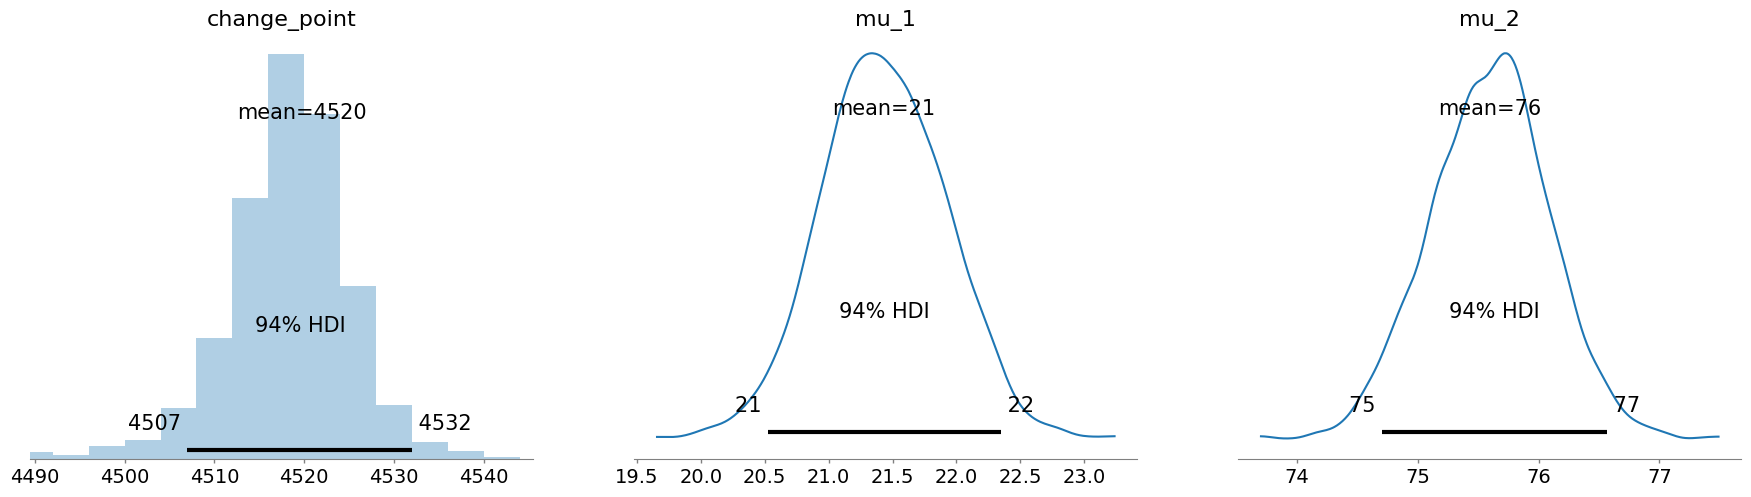

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [change_point]
>NUTS: [mu_1, mu_2]


Output()

Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 23 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


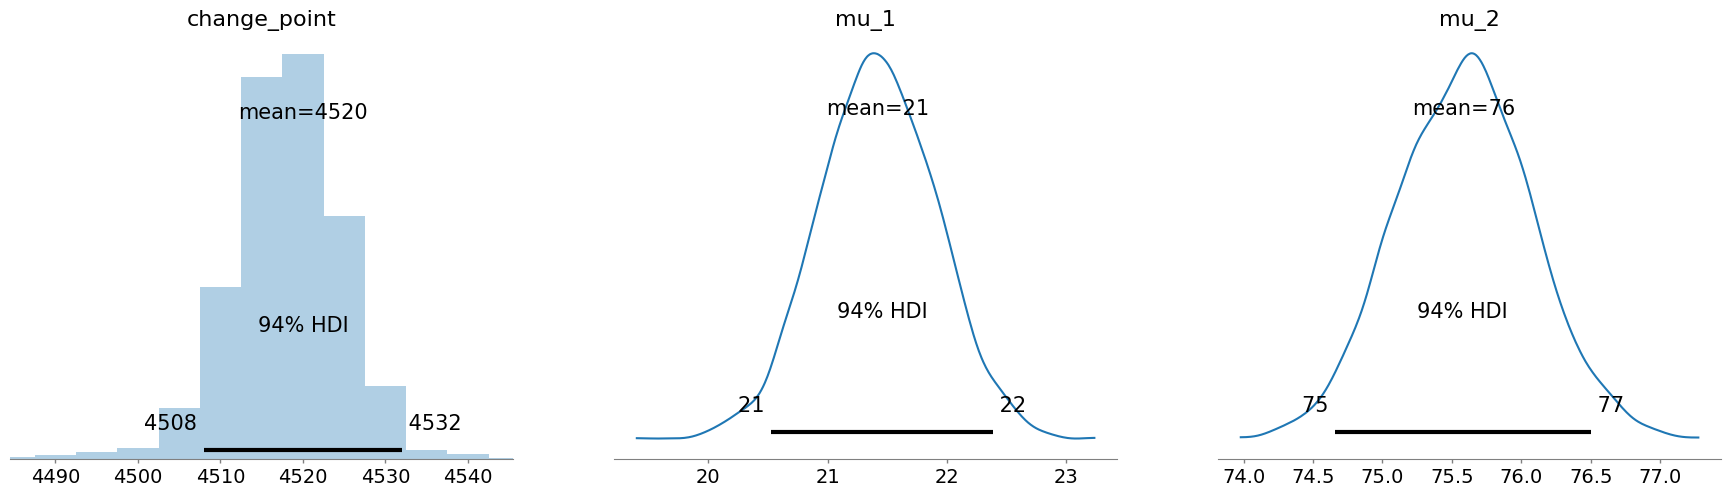

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [8]:
trace = bayesian_change_point_analysis(df)
bayesian_change_point_analysis(df)

The Bayesian change point analysis illustrated above provides insights into the potential point in time where a significant shift in the data's behavior occurs.

The analysis indicates a clear structural change around index $4520$, where the mean of the series shifts from around `21 to 76`. This could imply a shift in the underlying trend or a regime change, which may be due to an external factor influencing the data at that point.

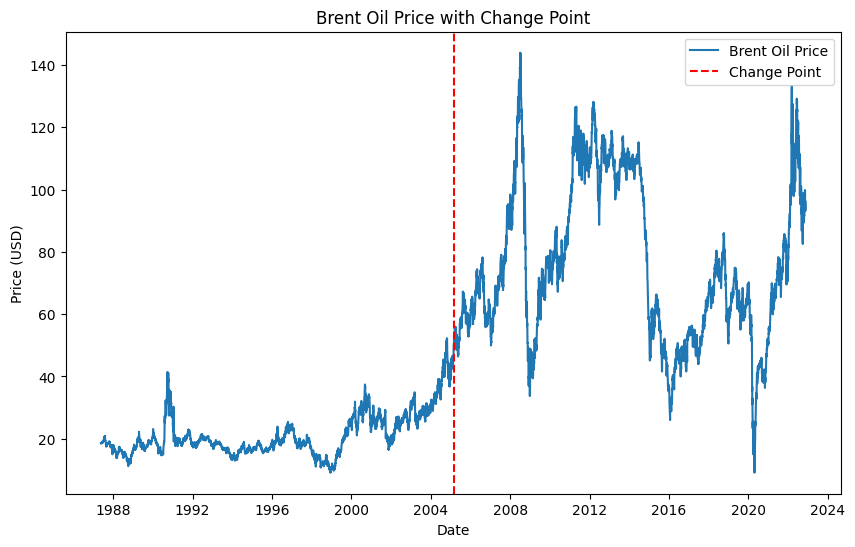

In [14]:
change_points_mean = 4520

plot_bayesian_change_points(df, change_points_mean)

The change point detected around index 4520 in the Brent oil price time series corresponds roughly to the year $2003-2004$. During this period, oil prices began a sharp upward trend, primarily due to the following historical factors:

1. **Iraq War (2003)**: The U.S.-led invasion of Iraq disrupted oil supplies and created uncertainty in global oil markets, causing prices to rise significantly.
2. **Rising Global Demand**: Around this time, rapid industrial growth in emerging economies, especially China, led to increased global demand for oil, further pushing prices upward.

These events marked the beginning of a period of volatility and generally higher oil prices, which are evident in the time series.

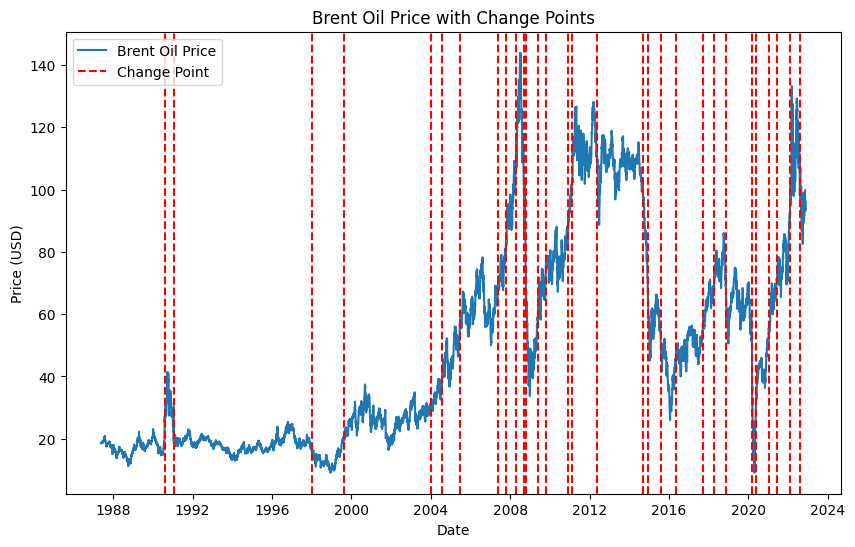

In [10]:
# Change Point Analysis
change_points = detect_change_points(df)
plot_change_points(df, change_points)

Here are some key historical events that have influenced oil prices over time in the Brent oil price time series:

**1990** - *Gulf War (Iraq's Invasion of Kuwait)*: Oil prices surged due to the threat to oil supply from the Middle East.

**1997-1998** - *Asian Financial Crisis*: Demand for oil decreased, leading to a price drop.

**2001** - *9/11 Attacks*: The attacks led to economic uncertainty, temporarily affecting oil prices.

**2003** - *Iraq War*: Prices rose due to concerns over supply disruption from the Middle East.

**2007-2008** - *Global Financial Crisis:* Oil prices spiked in early 2008 due to high demand and then crashed as the global economy slowed down.

**2010-2011** - *Arab Spring and Libyan Civil War*: Political instability in oil-producing regions caused price increases.

**2014-2016** - *Oil Supply Glut*: A surge in U.S. shale production and a decision by OPEC to maintain production led to a significant drop in oil prices.

**2020** - *COVID-19 Pandemic:* Global lockdowns and reduced travel demand led to a sharp decline in oil prices.

**2022** - *Russia-Ukraine War*: Concerns about disruptions to oil and gas supplies from Russia led to increased prices.

/home/seyfe/Desktop/KAIM/Brent_Oil_Price_Analysis/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/seyfe/Desktop/KAIM/Brent_Oil_Price_Analysis/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/seyfe/Desktop/KAIM/Brent_Oil_Price_Analysis/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/seyfe/Desktop/KAIM/Brent_Oil_Price_Analysis/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:

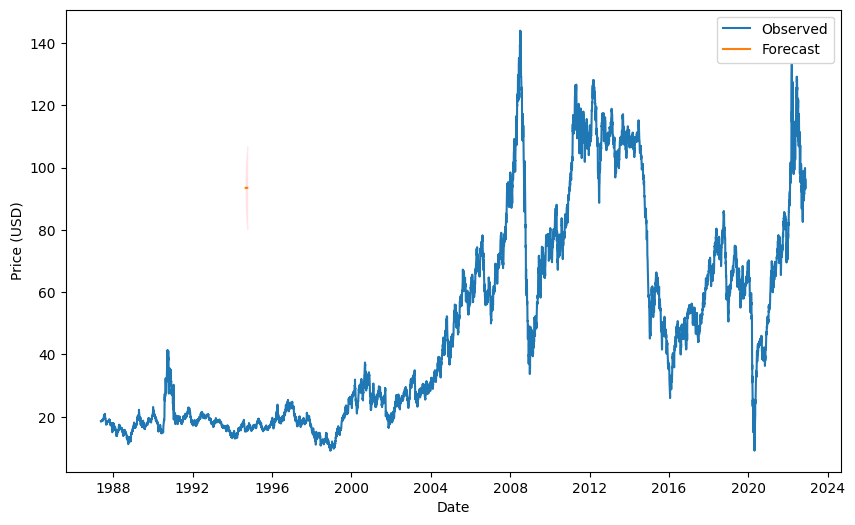

In [11]:
# Time Series Modeling - ARIMA
arima_result = fit_arima_model(df, order=(1, 1, 1))
plot_arima_forecast(df, arima_result, steps=30)

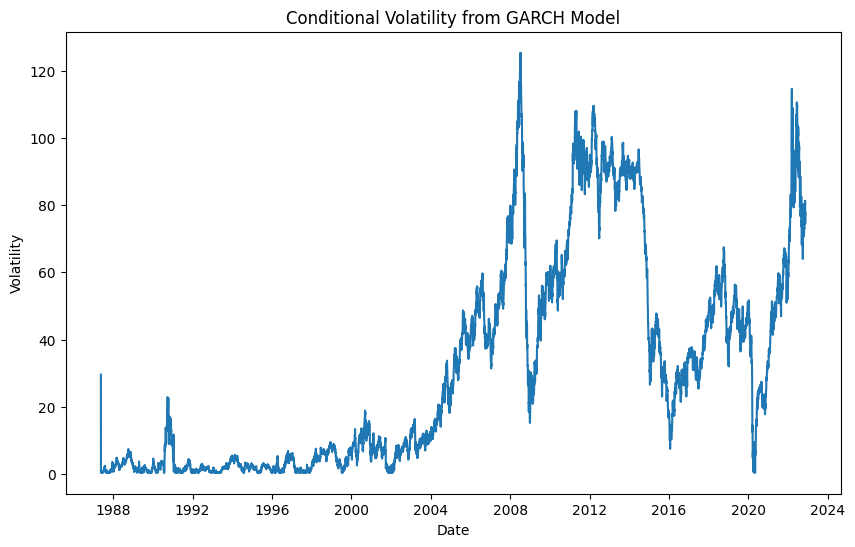

In [12]:
# Time Series Modeling - GARCH
garch_result = fit_garch_model(df)
plot_garch_volatility(garch_result)

This plot shows the conditional volatility of Brent oil prices estimated using a GARCH (Generalized Autoregressive Conditional Heteroskedasticity) model. Key insights include:

**High Volatility Periods:** Notable spikes in volatility align with major global events affecting oil prices, such as the 2008 Global Financial Crisis, the 2014-2016 oil glut, and the 2020 COVID-19 pandemic.

**Volatility Clustering:** Periods of high volatility tend to be followed by further high volatility, consistent with GARCH model characteristics.

**Recent Volatility:** The model shows increased volatility around 2020-2022, likely influenced by pandemic-related disruptions and the Russia-Ukraine conflict.